In [15]:
using CSV, DataFrames, Dates, Plots, Statistics, StatsBase

In [17]:
# Define a function for moving average
function movmean(data, window)
    n = length(data)
    result = Vector{Float64}(undef, n)
    for i in 1:n
        start_idx = max(1, i - div(window, 2))
        end_idx = min(n, i + div(window, 2))
        result[i] = mean(data[start_idx:end_idx])
    end
    return result
end

movmean (generic function with 1 method)

In [6]:
# Load the data starting from the 3rd row (skip metadata)
df = CSV.read("nrel_data.csv", DataFrame; header=3)

# Convert date and time columns into a DateTime column
df.Timestamp = DateTime.(df.Year, df.Month, df.Day, df.Hour, df.Minute)

# Sort by timestamp just in case
sort!(df, :Timestamp)

Row,Year,Month,Day,Hour,Minute,GHI,DNI,DHI,Timestamp
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,DateTime
1,2022,1,1,0,0,0,0,0,2022-01-01T00:00:00
2,2022,1,1,0,30,0,0,0,2022-01-01T00:30:00
3,2022,1,1,1,0,0,0,0,2022-01-01T01:00:00
4,2022,1,1,1,30,0,0,0,2022-01-01T01:30:00
5,2022,1,1,2,0,0,0,0,2022-01-01T02:00:00
6,2022,1,1,2,30,0,0,0,2022-01-01T02:30:00
7,2022,1,1,3,0,0,0,0,2022-01-01T03:00:00
8,2022,1,1,3,30,0,0,0,2022-01-01T03:30:00
9,2022,1,1,4,0,0,0,0,2022-01-01T04:00:00


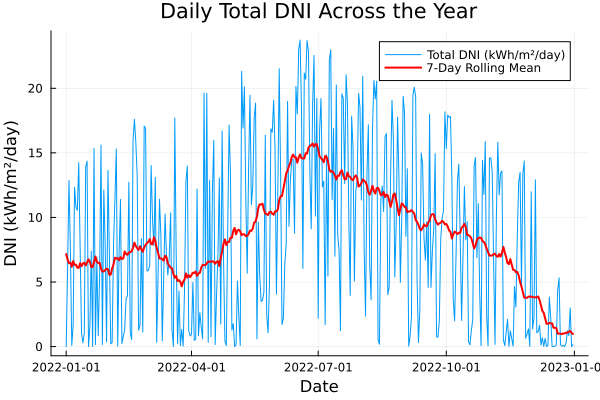

In [25]:
# Group by day and sum the DNI to get daily total DNI in Wh/m²
daily_total_dni = combine(groupby(df, [:Year, :Month, :Day]), :DNI => sum => :TotalDNI)

# Convert TotalDNI to kWh/m²/day
daily_total_dni.TotalDNI .= daily_total_dni.TotalDNI ./ 1000

# Create a Date column for plotting
daily_total_dni.Date = Date.(daily_total_dni.Year, daily_total_dni.Month, daily_total_dni.Day)

# Plot the total DNI per day in kWh/m²/day
plot(daily_total_dni.Date, daily_total_dni.TotalDNI, label="Total DNI (kWh/m²/day)", xlabel="Date", ylabel="DNI (kWh/m²/day)", title="Daily Total DNI Across the Year", legend=:topright)

# Calculate a rolling mean to show the trend curve
daily_total_dni.MeanDNI = movmean(daily_total_dni.TotalDNI, 30)


# Add the trend curve to the plot
plot!(daily_total_dni.Date, daily_total_dni.MeanDNI, label="7-Day Rolling Mean", color=:red, lw=2)

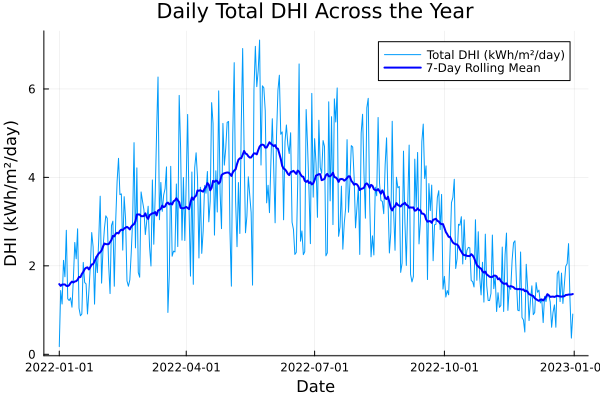

In [24]:
# Group by day and sum the DHI to get daily total DHI in Wh/m²
daily_total_dhi = combine(groupby(df, [:Year, :Month, :Day]), :DHI => sum => :TotalDHI)

# Convert TotalDHI to kWh/m²/day
daily_total_dhi.TotalDHI .= daily_total_dhi.TotalDHI ./ 1000

# Create a Date column for plotting
daily_total_dhi.Date = Date.(daily_total_dhi.Year, daily_total_dhi.Month, daily_total_dhi.Day)

# Plot the total DHI per day in kWh/m²/day
plot(daily_total_dhi.Date, daily_total_dhi.TotalDHI, label="Total DHI (kWh/m²/day)", xlabel="Date", ylabel="DHI (kWh/m²/day)", title="Daily Total DHI Across the Year", legend=:topright)

# Calculate a rolling mean to show the trend curve
daily_total_dhi.MeanDHI = movmean(daily_total_dhi.TotalDHI, 30)

# Add the trend curve to the plot
plot!(daily_total_dhi.Date, daily_total_dhi.MeanDHI, label="7-Day Rolling Mean", color=:blue, lw=2)

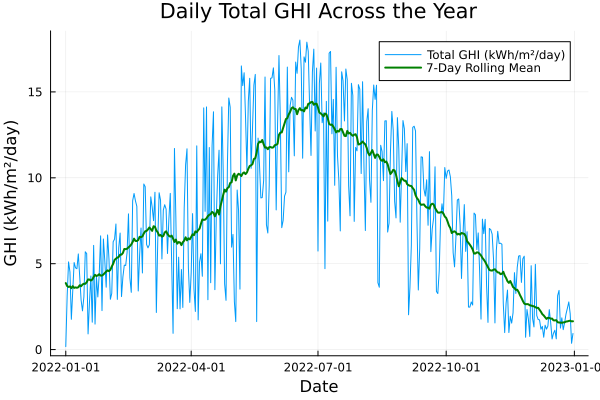

In [23]:
# Group by day and sum the GHI to get daily total GHI in Wh/m²
daily_total_ghi = combine(groupby(df, [:Year, :Month, :Day]), :GHI => sum => :TotalGHI)

# Convert TotalGHI to kWh/m²/day
daily_total_ghi.TotalGHI .= daily_total_ghi.TotalGHI ./ 1000

# Create a Date column for plotting
daily_total_ghi.Date = Date.(daily_total_ghi.Year, daily_total_ghi.Month, daily_total_ghi.Day)

# Plot the total GHI per day in kWh/m²/day
plot(daily_total_ghi.Date, daily_total_ghi.TotalGHI, label="Total GHI (kWh/m²/day)", xlabel="Date", ylabel="GHI (kWh/m²/day)", title="Daily Total GHI Across the Year", legend=:topright)

# Calculate a rolling mean to show the trend curve
daily_total_ghi.MeanGHI = movmean(daily_total_ghi.TotalGHI, 30)

# Add the trend curve to the plot
plot!(daily_total_ghi.Date, daily_total_ghi.MeanGHI, label="7-Day Rolling Mean", color=:green, lw=2)